# CS146 Project 2: Discrete and multi-level models

Below is a data set of GP (general practitioner) doctor visits in England\*. The data set is stratified by age and geographical region. For each age and region group, 30 people were sampled randomly and asked how often they attended an appointment with a GP during the past year.

You will note that there are some missing values in the data set. Your task is to fit an appropriate discrete count model for this data set and to estimate the counts in the missing cells.

\*Note: This data set is made up even though it is based on real statistics from the [National Health Service Digital data service](https://digital.nhs.uk/data).


In [ ]:
!uv pip install "pymc>=5.0" "ipykernel>=6.0" "matplotlib>=3.8" "pandas>=2.0" "jax[cpu]>=0.4" "blackjax>=0.96" "graphviz>=0.2"


# Data

The data set is in a 7 × 10 × 30 array for the 7 geographical regions, 10 age groups, and 30 samples per group. The cell below loads the data and plots the average number of GP visits for each group. You need to use all the data (not just the averages) but the averages should help to give you an idea of what the data set looks like.


In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy import nan

In [4]:
raw_data = np.array(
    [
        [
            [
                4,
                11,
                14,
                13,
                12,
                8,
                0,
                8,
                14,
                21,
                17,
                7,
                3,
                9,
                2,
                7,
                23,
                2,
                5,
                12,
                15,
                0,
                14,
                2,
                17,
                7,
                17,
                13,
                11,
                3,
            ],
            [
                4,
                4,
                10,
                2,
                24,
                1,
                10,
                0,
                0,
                5,
                1,
                3,
                3,
                3,
                0,
                9,
                5,
                0,
                4,
                14,
                3,
                0,
                9,
                1,
                6,
                1,
                5,
                2,
                0,
                4,
            ],
            [
                0,
                0,
                0,
                1,
                0,
                2,
                1,
                3,
                4,
                4,
                6,
                0,
                1,
                4,
                2,
                2,
                2,
                1,
                4,
                0,
                6,
                2,
                0,
                6,
                0,
                0,
                2,
                1,
                1,
                3,
            ],
            [
                5,
                0,
                3,
                5,
                3,
                3,
                2,
                3,
                3,
                3,
                3,
                4,
                3,
                7,
                2,
                1,
                0,
                1,
                0,
                2,
                3,
                1,
                5,
                0,
                1,
                1,
                4,
                2,
                4,
                0,
            ],
            [
                0,
                5,
                6,
                0,
                0,
                0,
                5,
                6,
                0,
                6,
                2,
                3,
                4,
                0,
                0,
                1,
                2,
                7,
                6,
                5,
                6,
                11,
                0,
                7,
                2,
                2,
                4,
                4,
                7,
                0,
            ],
            [
                9,
                4,
                0,
                5,
                0,
                9,
                2,
                0,
                6,
                1,
                7,
                4,
                10,
                11,
                1,
                0,
                6,
                0,
                14,
                6,
                6,
                2,
                0,
                0,
                0,
                3,
                5,
                3,
                2,
                7,
            ],
            [
                4,
                2,
                3,
                0,
                20,
                0,
                8,
                5,
                0,
                3,
                8,
                4,
                8,
                8,
                4,
                4,
                6,
                8,
                1,
                11,
                4,
                3,
                6,
                0,
                6,
                2,
                8,
                4,
                21,
                7,
            ],
            [
                12,
                5,
                5,
                4,
                11,
                17,
                7,
                13,
                0,
                11,
                6,
                0,
                9,
                0,
                0,
                10,
                15,
                3,
                7,
                11,
                9,
                23,
                20,
                0,
                0,
                3,
                27,
                0,
                7,
                4,
            ],
            [
                22,
                38,
                0,
                10,
                27,
                21,
                0,
                39,
                23,
                11,
                28,
                20,
                12,
                10,
                16,
                0,
                19,
                0,
                29,
                29,
                11,
                47,
                0,
                19,
                29,
                13,
                14,
                23,
                31,
                34,
            ],
            [
                26,
                75,
                29,
                25,
                43,
                34,
                15,
                10,
                41,
                27,
                0,
                21,
                28,
                8,
                24,
                29,
                0,
                0,
                47,
                0,
                44,
                0,
                20,
                0,
                48,
                0,
                0,
                0,
                30,
                35,
            ],
        ],
        [
            [
                6,
                18,
                6,
                5,
                14,
                0,
                7,
                10,
                4,
                12,
                15,
                9,
                2,
                30,
                12,
                0,
                9,
                0,
                14,
                23,
                6,
                5,
                0,
                2,
                11,
                8,
                25,
                0,
                30,
                0,
            ],
            [
                2,
                0,
                5,
                0,
                13,
                1,
                3,
                0,
                8,
                1,
                0,
                0,
                2,
                6,
                2,
                1,
                0,
                9,
                0,
                0,
                2,
                0,
                6,
                0,
                9,
                2,
                7,
                3,
                2,
                1,
            ],
            [
                3,
                1,
                0,
                3,
                5,
                2,
                3,
                3,
                7,
                4,
                0,
                2,
                2,
                6,
                1,
                3,
                0,
                4,
                4,
                2,
                2,
                0,
                2,
                2,
                0,
                4,
                2,
                0,
                2,
                1,
            ],
            [
                2,
                6,
                0,
                1,
                3,
                0,
                2,
                1,
                3,
                0,
                3,
                5,
                0,
                2,
                0,
                1,
                0,
                3,
                4,
                6,
                5,
                7,
                0,
                4,
                0,
                8,
                1,
                3,
                2,
                0,
            ],
            [
                5,
                0,
                0,
                0,
                9,
                0,
                0,
                2,
                2,
                4,
                1,
                9,
                5,
                1,
                1,
                0,
                0,
                4,
                2,
                4,
                3,
                6,
                0,
                4,
                6,
                0,
                0,
                2,
                5,
                0,
            ],
            [
                6,
                0,
                7,
                6,
                0,
                7,
                1,
                3,
                2,
                0,
                2,
                4,
                2,
                0,
                4,
                7,
                2,
                1,
                7,
                2,
                7,
                4,
                9,
                1,
                0,
                8,
                5,
                3,
                4,
                7,
            ],
            [
                9,
                8,
                3,
                5,
                1,
                7,
                4,
                4,
                0,
                6,
                1,
                0,
                0,
                6,
                2,
                0,
                0,
                0,
                7,
                5,
                0,
                10,
                0,
                6,
                0,
                6,
                5,
                2,
                0,
                2,
            ],
            [
                0,
                0,
                0,
                10,
                7,
                13,
                10,
                0,
                24,
                20,
                6,
                14,
                0,
                2,
                1,
                10,
                20,
                20,
                11,
                9,
                9,
                0,
                7,
                6,
                9,
                16,
                7,
                18,
                24,
                4,
            ],
            [
                19,
                28,
                38,
                30,
                19,
                25,
                46,
                6,
                13,
                0,
                21,
                9,
                13,
                14,
                13,
                0,
                21,
                40,
                6,
                25,
                8,
                22,
                15,
                28,
                0,
                17,
                14,
                35,
                25,
                13,
            ],
            [
                30,
                46,
                16,
                0,
                48,
                0,
                14,
                0,
                0,
                0,
                20,
                0,
                16,
                23,
                29,
                30,
                15,
                26,
                40,
                22,
                29,
                61,
                37,
                28,
                50,
                12,
                21,
                9,
                15,
                41,
            ],
        ],
        [
            [
                12,
                7,
                0,
                0,
                17,
                9,
                19,
                13,
                9,
                8,
                8,
                8,
                9,
                0,
                21,
                9,
                26,
                0,
                0,
                15,
                0,
                6,
                19,
                0,
                0,
                12,
                9,
                21,
                16,
                12,
            ],
            [
                2,
                2,
                4,
                0,
                4,
                6,
                7,
                0,
                7,
                0,
                5,
                0,
                0,
                9,
                6,
                2,
                0,
                0,
                4,
                4,
                2,
                6,
                3,
                0,
                0,
                8,
                0,
                7,
                3,
                0,
            ],
            [
                1,
                0,
                5,
                4,
                2,
                0,
                2,
                5,
                5,
                1,
                3,
                4,
                0,
                14,
                1,
                1,
                0,
                2,
                5,
                2,
                0,
                3,
                5,
                7,
                3,
                0,
                0,
                5,
                1,
                3,
            ],
            [
                0,
                4,
                2,
                2,
                3,
                0,
                0,
                2,
                4,
                0,
                0,
                1,
                1,
                3,
                0,
                5,
                7,
                0,
                3,
                0,
                2,
                1,
                2,
                2,
                0,
                9,
                4,
                0,
                2,
                5,
            ],
            [
                3,
                0,
                0,
                3,
                8,
                2,
                5,
                0,
                8,
                3,
                3,
                8,
                2,
                3,
                3,
                0,
                17,
                11,
                5,
                9,
                1,
                2,
                2,
                1,
                1,
                2,
                0,
                0,
                0,
                5,
            ],
            [
                4,
                5,
                9,
                9,
                3,
                10,
                0,
                8,
                3,
                0,
                2,
                5,
                2,
                0,
                4,
                4,
                1,
                0,
                6,
                15,
                0,
                5,
                5,
                0,
                0,
                2,
                9,
                2,
                0,
                0,
            ],
            [
                0,
                5,
                8,
                10,
                1,
                0,
                0,
                0,
                1,
                3,
                4,
                8,
                3,
                6,
                5,
                13,
                5,
                13,
                10,
                7,
                20,
                26,
                7,
                0,
                0,
                5,
                11,
                0,
                1,
                3,
            ],
            [
                14,
                5,
                5,
                0,
                11,
                13,
                9,
                22,
                0,
                8,
                10,
                20,
                0,
                0,
                8,
                5,
                8,
                16,
                11,
                0,
                17,
                0,
                8,
                1,
                7,
                33,
                3,
                15,
                0,
                20,
            ],
            [
                25,
                30,
                31,
                52,
                0,
                39,
                16,
                20,
                20,
                22,
                12,
                0,
                19,
                24,
                0,
                10,
                29,
                28,
                24,
                0,
                29,
                0,
                20,
                0,
                49,
                37,
                20,
                48,
                0,
                23,
            ],
            [
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
            ],
        ],
        [
            [
                0,
                21,
                14,
                4,
                0,
                17,
                13,
                0,
                14,
                0,
                15,
                32,
                15,
                6,
                0,
                14,
                0,
                17,
                24,
                10,
                16,
                9,
                19,
                9,
                10,
                9,
                17,
                13,
                0,
                19,
            ],
            [
                12,
                5,
                7,
                2,
                4,
                1,
                0,
                7,
                8,
                11,
                1,
                3,
                6,
                3,
                11,
                0,
                4,
                5,
                4,
                7,
                22,
                7,
                0,
                2,
                0,
                2,
                17,
                8,
                8,
                6,
            ],
            [
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
            ],
            [
                2,
                2,
                2,
                1,
                4,
                5,
                4,
                3,
                2,
                1,
                2,
                1,
                2,
                2,
                5,
                2,
                2,
                6,
                5,
                3,
                3,
                6,
                1,
                0,
                4,
                0,
                2,
                5,
                4,
                5,
            ],
            [
                6,
                0,
                2,
                10,
                7,
                0,
                8,
                14,
                3,
                0,
                3,
                3,
                8,
                9,
                2,
                7,
                0,
                4,
                0,
                5,
                5,
                2,
                2,
                3,
                4,
                10,
                0,
                0,
                5,
                0,
            ],
            [
                6,
                4,
                0,
                4,
                5,
                9,
                1,
                4,
                5,
                6,
                9,
                0,
                3,
                1,
                5,
                14,
                0,
                6,
                6,
                10,
                7,
                8,
                2,
                0,
                4,
                0,
                3,
                12,
                0,
                0,
            ],
            [
                1,
                12,
                2,
                2,
                4,
                10,
                13,
                0,
                4,
                9,
                12,
                8,
                5,
                5,
                3,
                2,
                2,
                5,
                6,
                7,
                6,
                2,
                7,
                6,
                1,
                14,
                8,
                6,
                8,
                8,
            ],
            [
                15,
                0,
                18,
                19,
                12,
                0,
                11,
                10,
                33,
                18,
                10,
                6,
                16,
                7,
                8,
                15,
                17,
                12,
                13,
                8,
                5,
                22,
                16,
                8,
                19,
                6,
                0,
                18,
                0,
                0,
            ],
            [
                62,
                0,
                0,
                29,
                22,
                0,
                39,
                23,
                28,
                0,
                21,
                30,
                18,
                0,
                47,
                0,
                15,
                0,
                16,
                0,
                27,
                0,
                30,
                28,
                45,
                58,
                18,
                48,
                30,
                15,
            ],
            [
                41,
                31,
                40,
                16,
                37,
                63,
                63,
                0,
                44,
                28,
                29,
                39,
                22,
                18,
                39,
                59,
                13,
                31,
                0,
                49,
                53,
                27,
                33,
                0,
                46,
                64,
                24,
                0,
                0,
                27,
            ],
        ],
        [
            [
                0,
                8,
                0,
                12,
                14,
                3,
                4,
                9,
                0,
                0,
                5,
                0,
                30,
                5,
                0,
                1,
                21,
                8,
                0,
                5,
                0,
                11,
                17,
                3,
                13,
                3,
                18,
                13,
                0,
                0,
            ],
            [
                6,
                5,
                1,
                0,
                0,
                0,
                12,
                7,
                4,
                7,
                0,
                8,
                0,
                7,
                4,
                4,
                0,
                2,
                12,
                7,
                3,
                8,
                4,
                4,
                5,
                8,
                2,
                10,
                0,
                5,
            ],
            [
                3,
                4,
                4,
                3,
                4,
                2,
                0,
                9,
                2,
                0,
                4,
                6,
                4,
                2,
                6,
                0,
                2,
                0,
                0,
                0,
                3,
                0,
                2,
                2,
                7,
                2,
                0,
                1,
                1,
                6,
            ],
            [
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
            ],
            [
                3,
                11,
                3,
                5,
                4,
                4,
                7,
                0,
                0,
                4,
                1,
                0,
                0,
                5,
                0,
                2,
                10,
                4,
                5,
                0,
                5,
                7,
                4,
                6,
                1,
                0,
                0,
                3,
                1,
                4,
            ],
            [
                0,
                4,
                4,
                3,
                0,
                0,
                4,
                6,
                4,
                7,
                2,
                0,
                0,
                5,
                5,
                0,
                8,
                0,
                8,
                5,
                0,
                4,
                0,
                0,
                5,
                15,
                7,
                2,
                0,
                1,
            ],
            [
                0,
                5,
                12,
                5,
                4,
                5,
                5,
                4,
                8,
                1,
                4,
                0,
                0,
                4,
                0,
                3,
                6,
                0,
                0,
                0,
                0,
                0,
                1,
                0,
                12,
                0,
                8,
                0,
                1,
                3,
            ],
            [
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
            ],
            [
                41,
                7,
                2,
                31,
                20,
                14,
                26,
                29,
                8,
                0,
                25,
                20,
                21,
                30,
                18,
                0,
                10,
                0,
                32,
                18,
                6,
                33,
                43,
                13,
                31,
                24,
                22,
                39,
                44,
                0,
            ],
            [
                29,
                0,
                20,
                29,
                26,
                40,
                29,
                0,
                42,
                19,
                8,
                32,
                29,
                22,
                30,
                24,
                29,
                35,
                0,
                46,
                39,
                35,
                19,
                13,
                9,
                5,
                14,
                18,
                0,
                34,
            ],
        ],
        [
            [
                6,
                16,
                0,
                10,
                9,
                4,
                24,
                6,
                0,
                10,
                7,
                5,
                5,
                11,
                11,
                12,
                0,
                0,
                0,
                8,
                14,
                5,
                0,
                8,
                7,
                0,
                26,
                0,
                0,
                20,
            ],
            [
                7,
                0,
                8,
                2,
                3,
                13,
                11,
                5,
                7,
                7,
                0,
                0,
                4,
                0,
                3,
                15,
                3,
                8,
                8,
                5,
                12,
                1,
                4,
                14,
                11,
                4,
                6,
                0,
                5,
                3,
            ],
            [
                6,
                4,
                2,
                4,
                4,
                0,
                1,
                3,
                2,
                3,
                2,
                1,
                6,
                0,
                2,
                1,
                2,
                0,
                2,
                2,
                2,
                2,
                2,
                5,
                0,
                3,
                2,
                2,
                6,
                2,
            ],
            [
                0,
                4,
                4,
                0,
                1,
                4,
                2,
                3,
                4,
                2,
                4,
                5,
                0,
                4,
                0,
                0,
                3,
                0,
                0,
                1,
                1,
                4,
                7,
                4,
                2,
                4,
                6,
                3,
                3,
                4,
            ],
            [
                4,
                3,
                3,
                0,
                5,
                2,
                1,
                3,
                7,
                5,
                0,
                0,
                0,
                1,
                4,
                3,
                4,
                1,
                6,
                0,
                6,
                9,
                0,
                5,
                6,
                0,
                6,
                0,
                5,
                4,
            ],
            [
                6,
                1,
                3,
                4,
                6,
                0,
                0,
                7,
                5,
                2,
                0,
                7,
                0,
                2,
                0,
                5,
                0,
                5,
                2,
                0,
                0,
                3,
                8,
                6,
                2,
                5,
                1,
                5,
                2,
                3,
            ],
            [
                10,
                3,
                1,
                9,
                12,
                9,
                1,
                0,
                6,
                0,
                1,
                0,
                5,
                4,
                2,
                0,
                9,
                0,
                1,
                3,
                0,
                5,
                22,
                6,
                14,
                11,
                9,
                6,
                5,
                4,
            ],
            [
                9,
                0,
                7,
                12,
                9,
                14,
                13,
                14,
                12,
                13,
                0,
                10,
                8,
                5,
                5,
                8,
                8,
                0,
                28,
                0,
                0,
                23,
                0,
                0,
                14,
                7,
                17,
                0,
                8,
                17,
            ],
            [
                7,
                62,
                0,
                0,
                16,
                0,
                0,
                30,
                18,
                22,
                12,
                0,
                24,
                0,
                13,
                0,
                0,
                7,
                9,
                0,
                67,
                29,
                49,
                34,
                31,
                40,
                26,
                25,
                25,
                21,
            ],
            [
                28,
                39,
                0,
                33,
                32,
                23,
                0,
                20,
                36,
                16,
                20,
                0,
                24,
                60,
                17,
                28,
                48,
                84,
                16,
                57,
                29,
                35,
                14,
                0,
                0,
                67,
                25,
                19,
                37,
                0,
            ],
        ],
        [
            [
                14,
                0,
                34,
                16,
                0,
                4,
                8,
                22,
                11,
                0,
                13,
                17,
                18,
                14,
                35,
                9,
                10,
                9,
                13,
                10,
                12,
                7,
                6,
                20,
                11,
                12,
                0,
                0,
                7,
                0,
            ],
            [
                5,
                12,
                0,
                10,
                8,
                0,
                7,
                0,
                6,
                0,
                20,
                0,
                10,
                0,
                3,
                6,
                9,
                8,
                7,
                0,
                3,
                7,
                10,
                5,
                7,
                5,
                3,
                0,
                8,
                0,
            ],
            [
                9,
                3,
                3,
                0,
                2,
                0,
                4,
                8,
                5,
                1,
                0,
                4,
                3,
                3,
                3,
                0,
                0,
                1,
                5,
                2,
                2,
                12,
                0,
                1,
                4,
                2,
                1,
                0,
                2,
                0,
            ],
            [
                3,
                0,
                5,
                0,
                0,
                1,
                1,
                3,
                1,
                1,
                1,
                3,
                4,
                4,
                4,
                8,
                5,
                0,
                0,
                12,
                0,
                1,
                0,
                4,
                4,
                5,
                1,
                9,
                3,
                1,
            ],
            [
                8,
                2,
                11,
                0,
                8,
                0,
                0,
                5,
                7,
                4,
                10,
                0,
                13,
                2,
                0,
                0,
                0,
                5,
                3,
                0,
                8,
                4,
                7,
                2,
                3,
                5,
                3,
                8,
                3,
                11,
            ],
            [
                5,
                2,
                5,
                4,
                10,
                2,
                10,
                4,
                14,
                3,
                3,
                2,
                2,
                13,
                8,
                2,
                3,
                9,
                0,
                0,
                6,
                2,
                5,
                6,
                0,
                0,
                3,
                2,
                7,
                4,
            ],
            [
                0,
                6,
                3,
                8,
                0,
                5,
                3,
                10,
                5,
                8,
                17,
                13,
                0,
                8,
                2,
                6,
                6,
                2,
                5,
                10,
                8,
                6,
                10,
                0,
                7,
                5,
                4,
                8,
                9,
                20,
            ],
            [
                20,
                16,
                16,
                20,
                11,
                3,
                13,
                1,
                0,
                0,
                0,
                3,
                5,
                9,
                0,
                21,
                10,
                13,
                8,
                22,
                19,
                7,
                19,
                21,
                4,
                0,
                2,
                10,
                0,
                19,
            ],
            [
                12,
                0,
                33,
                20,
                36,
                35,
                16,
                26,
                12,
                51,
                0,
                37,
                0,
                15,
                41,
                35,
                37,
                30,
                11,
                32,
                33,
                18,
                45,
                22,
                19,
                0,
                43,
                19,
                14,
                19,
            ],
            [
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
                nan,
            ],
        ],
    ]
)

# Define age groups and regions for plotting
ages = [
    "0-9",
    "10-19",
    "20-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90+",
]
regions = [
    "London",
    "South East",
    "South West",
    "East of England",
    "West Midlands",
    "East Midlands",
    "North West",
]

# Additional variables for data dimensions
sample_size = 30

plt.rcParams.update({"font.size": 9})

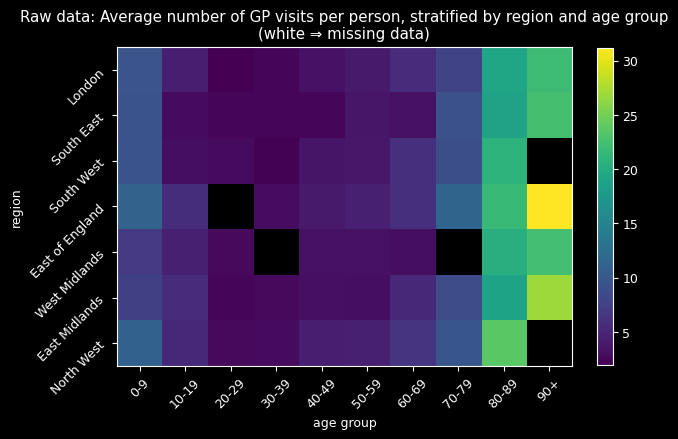

In [5]:
def plot_heatmap(data: np.array, model_name: str = ""):
    plt.figure()
    plt.title(
        f"{model_name}: Average number of GP visits per person, stratified by region and age group\n(white ⇒ missing data)"
    )
    plt.xlabel("age group")
    plt.ylabel("region")
    plt.imshow(data)
    plt.colorbar(fraction=0.032)
    plt.xticks(range(len(ages)), ages, rotation=45)
    plt.yticks(range(len(regions)), regions, rotation=45)
    plt.show()


plot_heatmap(raw_data.mean(axis=2), "Raw data")

To make the data easier to work with in PyMC, we reorganize it into 3 arrays — the region index (an integer indicating which geographical region each count is from), the age index (an integer for each age category), and the counts of the number of visits. We also leave out the missing (NaN) values since PyMC can't use those as observed values.


In [6]:
# Find non-NaN indices
non_nan_indices = np.nonzero(~np.isnan(raw_data))

# Extract region indices, age indices, and counts
region_idx = non_nan_indices[0]
age_idx = non_nan_indices[1]
counts = raw_data[non_nan_indices].astype(int)

print("Total data points:", raw_data.size)
print("Total filled data:", region_idx.size)

Total data points: 2100
Total filled data: 1950


In [7]:
# get location (indices) of missing data points

missing_data_indices = np.nonzero(np.isnan(raw_data))
missing_data_indices = list(zip(*missing_data_indices))

# Model

We will use a Zero-Inflated Poisson likelihood function for this data set. The motivation for making it zero-inflated is that there are many more 0s in the data set than we would expect from a Poisson distribution since a lot of people never visit the doctor. This might be because they don't like doctors, don't take their health seriously, procrastinate, etc. We suspect that those people who do sometimes visit a doctor, follow a Poisson distribution for the number of appointments in a year.


## Complete pooling

Complete pooling would assume that the underlying parameter values are similar across all groups (stratified by age groups and regions).

As suggested, we will use the Zero-Inflated Poisson
$$y \sim \text{ZeroInflatedPoisson}(\psi, \lambda)$$
where parameters come from the same distribution

- $\lambda$ = mean count of GP visits, must be non-negative
- $\psi$ = probability of zero visits, must be between 0 and 1

As prior knowledge, we know that $\lambda \geq 0$ and the majority of number GP visits are between 2 and 25 ($2\leq \lambda \leq 20$). I also assume that most people who visit general practitioners do so twice a year (recommended practice). A reasonable prior that satisfies all these three conditions are Truncated Normal (truncated at 0):

$$\lambda \sim \text{Truncated-Normal}(\mu=2,\sigma=15, \text{lower}=0)$$

The scale parameter of 15 comes from the 68-95-99.7 rule: 95% of values under a Normal distribution are within 2 standard deviations around the mean. Therefore an SD is roughly (25-2) / 2 = 11.5. I choose 15 to express a higher degree of uncertainty in the initial belief about the typical count of GP visits. $\lambda \sim \text{Half-Normal}(\sigma=15)$ would also yield the same result when making inferences.

For the probability of zero visits $\psi$, I will pick a non-informative prior to reflect my lack of strong prior beliefs. A common choice for this is a Uniform distribution for probabilities

$$\psi \sim \text{Uniform}(0,1)$$

which is equivalent to

$$\psi \sim \text{Beta}(1,1)$$

The complete model for complete pooling:

$$
\begin{align*}
y &\sim \text{ZeroInflatedPoisson}(\psi, \lambda)\\
\\
\text{Priors:}\\
\psi &\sim \text{Beta}(1,1)\\
\lambda &\sim \text{Truncated-Normal}(2,10^{2}, \text{lower}=0)
\end{align*}
$$


Sampling: [lambda, psi, y]


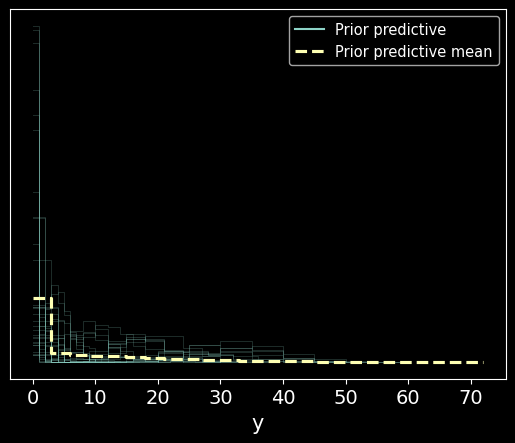

<Axes: xlabel='y'>

In [8]:
import pymc as pm
import arviz as az

# Define the model
with pm.Model() as complete_pooling_model:
    # Define priors
    rate = pm.TruncatedNormal("lambda", mu=2, sigma=15, lower=0)  # more 0s, lambda rate
    zero_prob = pm.Beta("psi", alpha=1, beta=1)  # uniform, probability of zeros

    # Define likelihood
    likelihood = pm.ZeroInflatedPoisson("y", psi=zero_prob, mu=rate, observed=counts)
    complete_pool_pp = pm.sample_prior_predictive(samples=500)

# plot the prior predictive distribution
az.plot_ppc(
    complete_pool_pp,
    group="prior",
    observed=False,
    num_pp_samples=30,
    kind="kde",
    show=True,
)

I can't figure out how to change the labels on the plot, but the x-axis is the number of GP visits and the y-axis is the probability of that number of visits.

The prior predictive plot above shows that most of the GP visits are between 2 and 25, which is consistent with our prior belief. The prior predictive range is between 0 and 70, which shows enough flexibility to fit the data.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
lambda  10.734  0.084  10.577   10.891      0.001    0.001    3327.0   
psi      0.771  0.010   0.753    0.789      0.000    0.000    3073.0   

        ess_tail  r_hat  
lambda    2503.0    1.0  
psi       2171.0    1.0

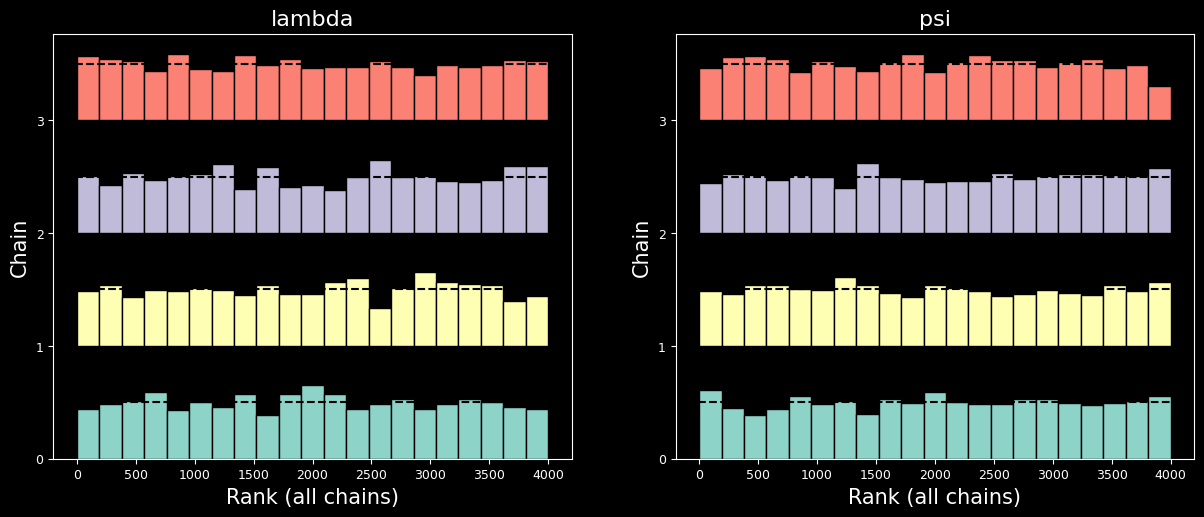

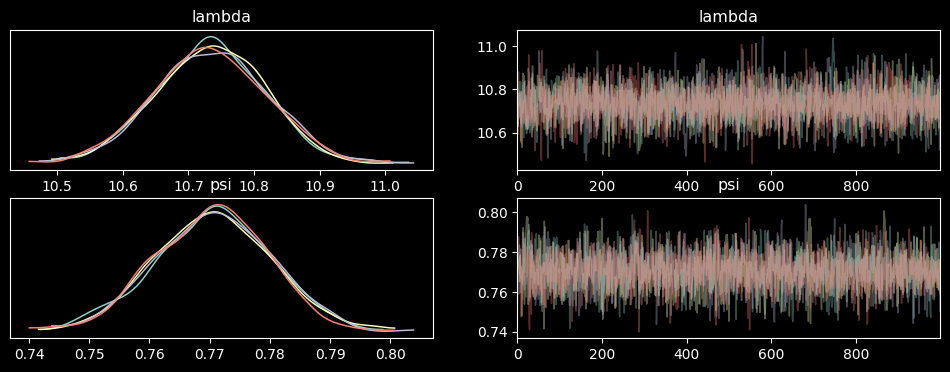

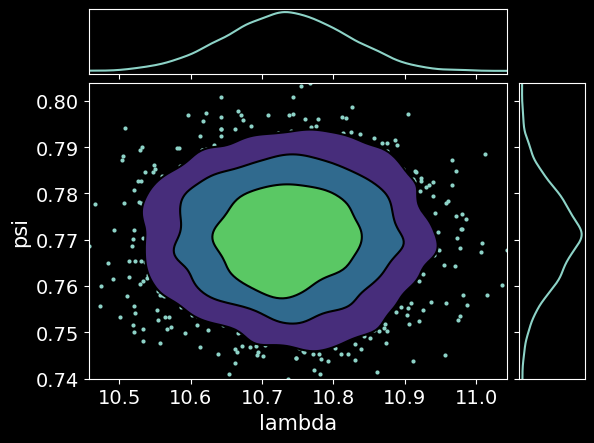

In [9]:
from src.utils.convergence import check_sampler

complete_pooling_inference = pm.sample(
    model=complete_pooling_model,
    nuts_sampler="blackjax",
    draws=1000,
    tune=1000,
    cores=4,
    chains=4,
    progressbar=False,
)

check_sampler(complete_pooling_inference, var_names=None)

Above, convergence between chains are chcked with `az.summary`, rank plots, trace plots, and posterior pairplots. The rank plots show that the chains are well-mixed and the trace plots show that the chains are stationary. The posterior pairplots show that the parameters $\lambda$ and $\psi$ are not correlated. The `az.summary` shows that the Gelman-Rubin statistic is 1 and high effective sample size, which indicate convergence. Overall, the sampler was working well to generate reliable posterior.


## Partial pooling

In this context, partial pooling implies that each of 70 groups (identified by a unique combination of age group and geographical region) has its own specific parameters, but these parameters are influenced by a common set of parameters. This allows for sharing information across groups, while allowing some variations between groups.

As suggested, we will use the Zero-Inflated Poisson

$$y_{jk} \sim \text{ZeroInflatedPoisson}(\psi, \lambda_{jk})$$
where

- $\lambda \geq 0$ : mean count of GP visits and varies between groups, based on age groups and geographical location
- $\psi\in [0,1]$ : probability of zero visits and is common between groups
- $j=1, 2, \ldots 7$ : index for region
- $k=1,2,\ldots, 10$ : index for age group

Since the probability of zero visits $\psi$ is common between groups, I reuse the prior from the complete pooling model

$$\psi \sim \text{Beta}(1,1)$$

We want to incorporate the effects of age and region into the rate of GP visits $\lambda$. A common choice is a linear function of theses effects to model the **additive impact** of those factors on the rate $\lambda$. I don't have strong enough beliefs to express these effects under a non-linear function (e.g. uncertain whether age has squared effects) and I will let the model decide the regression coefficients (weights of age and region). Further, a linear function is clear and more interpretable.

$$\log(\lambda_{jk}) \sim \alpha + \beta_{\text{age}[j]} + \beta_{\text{region}[k]}$$

where

- the rate for each group $\lambda_{jk}$ (non-negative) is passed through a logarithmic function to take on a unconstrained, continuous scale
- a common intercept $\alpha$ for all groups, where the effects of age group and region are both reduced to 0
- the coefficient $\beta_{\text{age​}[j]}$ for the $i$-th age group
- the coefficient $\beta_{\text{region}[k]}$ for the $k$-th region

There is no information or beliefs on the common intercept $\alpha$, so I will go ahead with a weak prior

$$\alpha \sim \text{Normal}(0,10^2)$$

which assumes the intercept will mostly take values around 0.

For partial pooling, coefficients should vary between groups but come from common set of hyperparameters. I want to express weak beliefs for their priors. This usually means I assume mostly no effects of neither age group nor region, and a relatively large uncertainty around the mode. Such priors can be expressed by Normal distributions as follows:

$$
\begin{align*}
\beta_\text{age} &\sim \text{Normal}(\mu_{\text{age}},\sigma_{\text{age}}^{2})\\
\beta_\text{region} &\sim \text{Normal}(\mu_{\text{region}},\sigma_{\text{region}}^{2})
\end{align*}
$$

where the hyperparameters are

- $\mu_{\text{age}}$ : the mean of the coefficient $\beta_\text{age}$, which means the mode of the coefficient of age
- $\sigma_\text{age}\geq 0$ : the standard deviation of the coefficient $\beta_\text{age}$, which intuitively means the uncertainty around the coefficient of age
- $\mu_{\text{region}}$ : the mean of the coefficient $\beta_\text{region}$
- $\sigma_\text{age}\geq 0$ : the standard deviation of the coefficient $\beta_\text{region}$

Since I assume mostly no effects of neither age group nor region, I want the mean hyperparamters ($\mu_{\text{age}}$, $\mu_{\text{region}}$) to be around 0. Considering that the coefficients are used to model the log rate $\log(\lambda_{jk})$ for each group, large uncertainty for these mean hyperparameters will just be around 1.

$$
\begin{align*}
\mu_{\text{age}}&\sim \text{Normal}(0,1^{2})\\ \mu_{\text{region}}&\sim \text{Normal}(0,1^{2})\\
\end{align*}
$$

To ensure that the standard deviation hyperparameters represent the variability in the age group and region effects and are non-negative, I have choices among Exponential, Gamma, or Inverse Gamma distributions. I will pick $\text{Exponential}(\lambda_{\sigma})$ here for easy parameterization and know quantities (mean, median, mode, variance). In the case $\lambda_{\sigma}=1$, mean = variance = 1, which are enough to model the uncertainty around coefficients of age group and region.

$$
\begin{align*}
\sigma_{\text{age}}&\sim \text{Exponential}(1)\\
\sigma_{\text{region}}&\sim \text{Exponential}(1)
\end{align*}
$$

The complete model for partial pooling:

$$
\begin{align*}
y_{jk} &\sim \text{ZeroInflatedPoisson}(\psi, \lambda_{jk})\\
\log(\lambda_{jk}) &\sim \alpha + \beta_{\text{age}[j]} + \beta_{\text{region}[k]}
\\\\
\text{Priors:}\\
\psi &\sim \text{Beta}(1,1)\\
\alpha &\sim \text{Normal}(0,10^2)\\
\beta_\text{age} &\sim \text{Normal}(\mu_{\text{age}},\sigma_{\text{age}}^{2})\\
\beta_\text{region} &\sim \text{Normal}(\mu_{\text{region}},\sigma_{\text{region}}^{2})\\
\\
\text{Hyperpriors:}\\
\mu_{\text{age}}&\sim \text{Normal}(0,1^{2})\\
\sigma_{\text{age}}&\sim \text{Exponential}(1)\\
\mu_{\text{region}}&\sim \text{Normal}(0,1^{2})\\
\sigma_{\text{region}}&\sim \text{Exponential}(1)
\end{align*}
$$


Sampling: [alpha, beta_age, beta_region, mu_age, mu_region, psi, sigma_age, sigma_region, y]


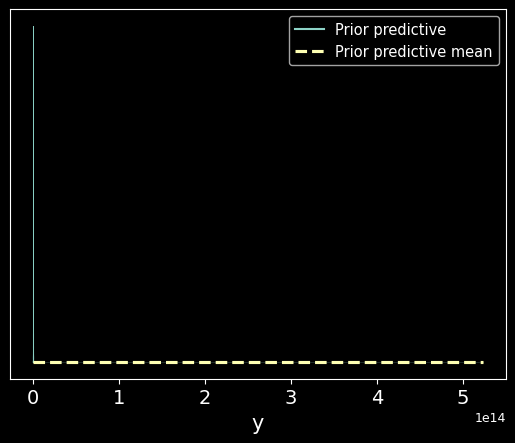

<Axes: xlabel='y'>

In [11]:
coords = {"region": regions, "age": ages, "sample": np.arange(sample_size)}

with pm.Model(coords=coords) as hierarchical_model:
    # Hyperpriors for region effects
    sigma_region = pm.Exponential("sigma_region", lam=1)
    mu_region = pm.Normal("mu_region", mu=0, sigma=1)

    # Hyperpriors for age effects
    sigma_age = pm.Exponential("sigma_age", lam=1)
    mu_age = pm.Normal("mu_age", mu=0, sigma=1)

    # Priors for alpha and betas
    alpha = pm.Normal("alpha", mu=0, sigma=10)  # common intercept
    beta_region = pm.Normal(
        "beta_region", dims="region", mu=mu_region, sigma=sigma_region
    )
    beta_age = pm.Normal("beta_age", dims="age", mu=mu_age, sigma=sigma_age)

    # Calculate psi and lambda for each group
    psi = pm.Beta("psi", alpha=1, beta=1)  # prior common across all groups
    lambda_ = pm.Deterministic(
        "lambda", pm.math.exp(alpha + beta_region[region_idx] + beta_age[age_idx])
    )

    # Likelihood
    likelihood = pm.ZeroInflatedPoisson(
        "y",
        psi=psi,
        mu=lambda_,
        observed=counts,
    )

    # Prior predictive samples
    hierarchical_prior_pred = pm.sample_prior_predictive(samples=500)

az.plot_ppc(
    hierarchical_prior_pred, group="prior", observed=False, kind="kde", show=True
)

I can't figure out how to change the labels on the plot, but the x-axis is the number of GP visits and the y-axis is the probability for that number of visits.

The prior predictive plots a very large range of GP visits (10^16), which shows generous flexibility to fit the data.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y]
/Users/chiffonng/Downloads/school/CS146-bayesian-inference/.venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (23), generating only 20 plots
  warnings.warn(
/Users/chiffonng/Downloads/school/CS146-bayesian-inference/.venv/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  \
mu_region                     0.033  0.952  -1.776    1.781      0.047   
mu_age                        0.119  0.990  -1.643    2.003      0.045   
alpha                         1.911  1.399  -0.631    4.542      0.074   
beta_region[London]          -0.031  0.953  -1.846    1.732      0.046   
beta_region[South East]      -0.096  0.952  -1.841    1.723      0.046   
beta_region[South West]       0.078  0.953  -1.691    1.881      0.046   
beta_region[East of England]  0.179  0.953  -1.634    1.934      0.047   
beta_region[West Midlands]   -0.094  0.952  -1.848    1.715      0.046   
beta_region[East Midlands]    0.047  0.953  -1.736    1.832      0.047   
beta_region[North West]       0.140  0.953  -1.675    1.898      0.046   
beta_age[0-9]                 0.542  1.019  -1.289    2.371      0.048   
beta_age[10-19]              -0.166  1.019  -1.953    1.711      0.048   
beta_age[20-29]              -0.794  1.019  -2.559    1.100      0.048   
beta_age[30-39]              -0.821  1.020  -2.648    1.008      0.048   
beta_age[40-49]              -0.389  1.018  -2.210    1.466      0.048   
beta_age[50-59]              -0.330  1.017  -2.155    1.513      0.048   
beta_age[60-69]              -0.107  1.018  -1.883    1.792      0.048   
beta_age[70-79]               0.507  1.018  -1.343    2.331      0.048   
beta_age[80-89]               1.293  1.018  -0.536    3.131      0.048   
beta_age[90+]                 1.524  1.018  -0.287    3.384      0.048   
sigma_region                  0.145  0.061   0.061    0.254      0.002   
sigma_age                     0.903  0.238   0.522    1.316      0.006   
psi                           0.779  0.010   0.761    0.796      0.000   

                              mcse_sd  ess_bulk  ess_tail  r_hat  
mu_region                       0.025     421.0     843.0   1.01  
mu_age                          0.027     477.0     753.0   1.01  
alpha                           0.041     358.0     634.0   1.02  
beta_region[London]             0.025     423.0     860.0   1.01  
beta_region[South East]         0.025     423.0     814.0   1.01  
beta_region[South West]         0.025     425.0     848.0   1.01  
beta_region[East of England]    0.025     423.0     849.0   1.01  
beta_region[West Midlands]      0.025     423.0     843.0   1.01  
beta_region[East Midlands]      0.025     422.0     839.0   1.01  
beta_region[North West]         0.025     425.0     835.0   1.01  
beta_age[0-9]                   0.029     448.0     694.0   1.01  
beta_age[10-19]                 0.029     447.0     683.0   1.01  
beta_age[20-29]                 0.029     448.0     669.0   1.01  
beta_age[30-39]                 0.029     448.0     705.0   1.01  
beta_age[40-49]                 0.029     447.0     708.0   1.01  
beta_age[50-59]                 0.029     447.0     676.0   1.01  
beta_age[60-69]                 0.029     447.0     667.0   1.01  
beta_age[70-79]                 0.029     448.0     683.0   1.01  
beta_age[80-89]                 0.029     448.0     665.0   1.01  
beta_age[90+]                   0.029     447.0     674.0   1.01  
sigma_region                    0.003    1657.0    1454.0   1.01  
sigma_age                       0.008    1880.0    1669.0   1.00  
psi                             0.000    2265.0    2126.0   1.01

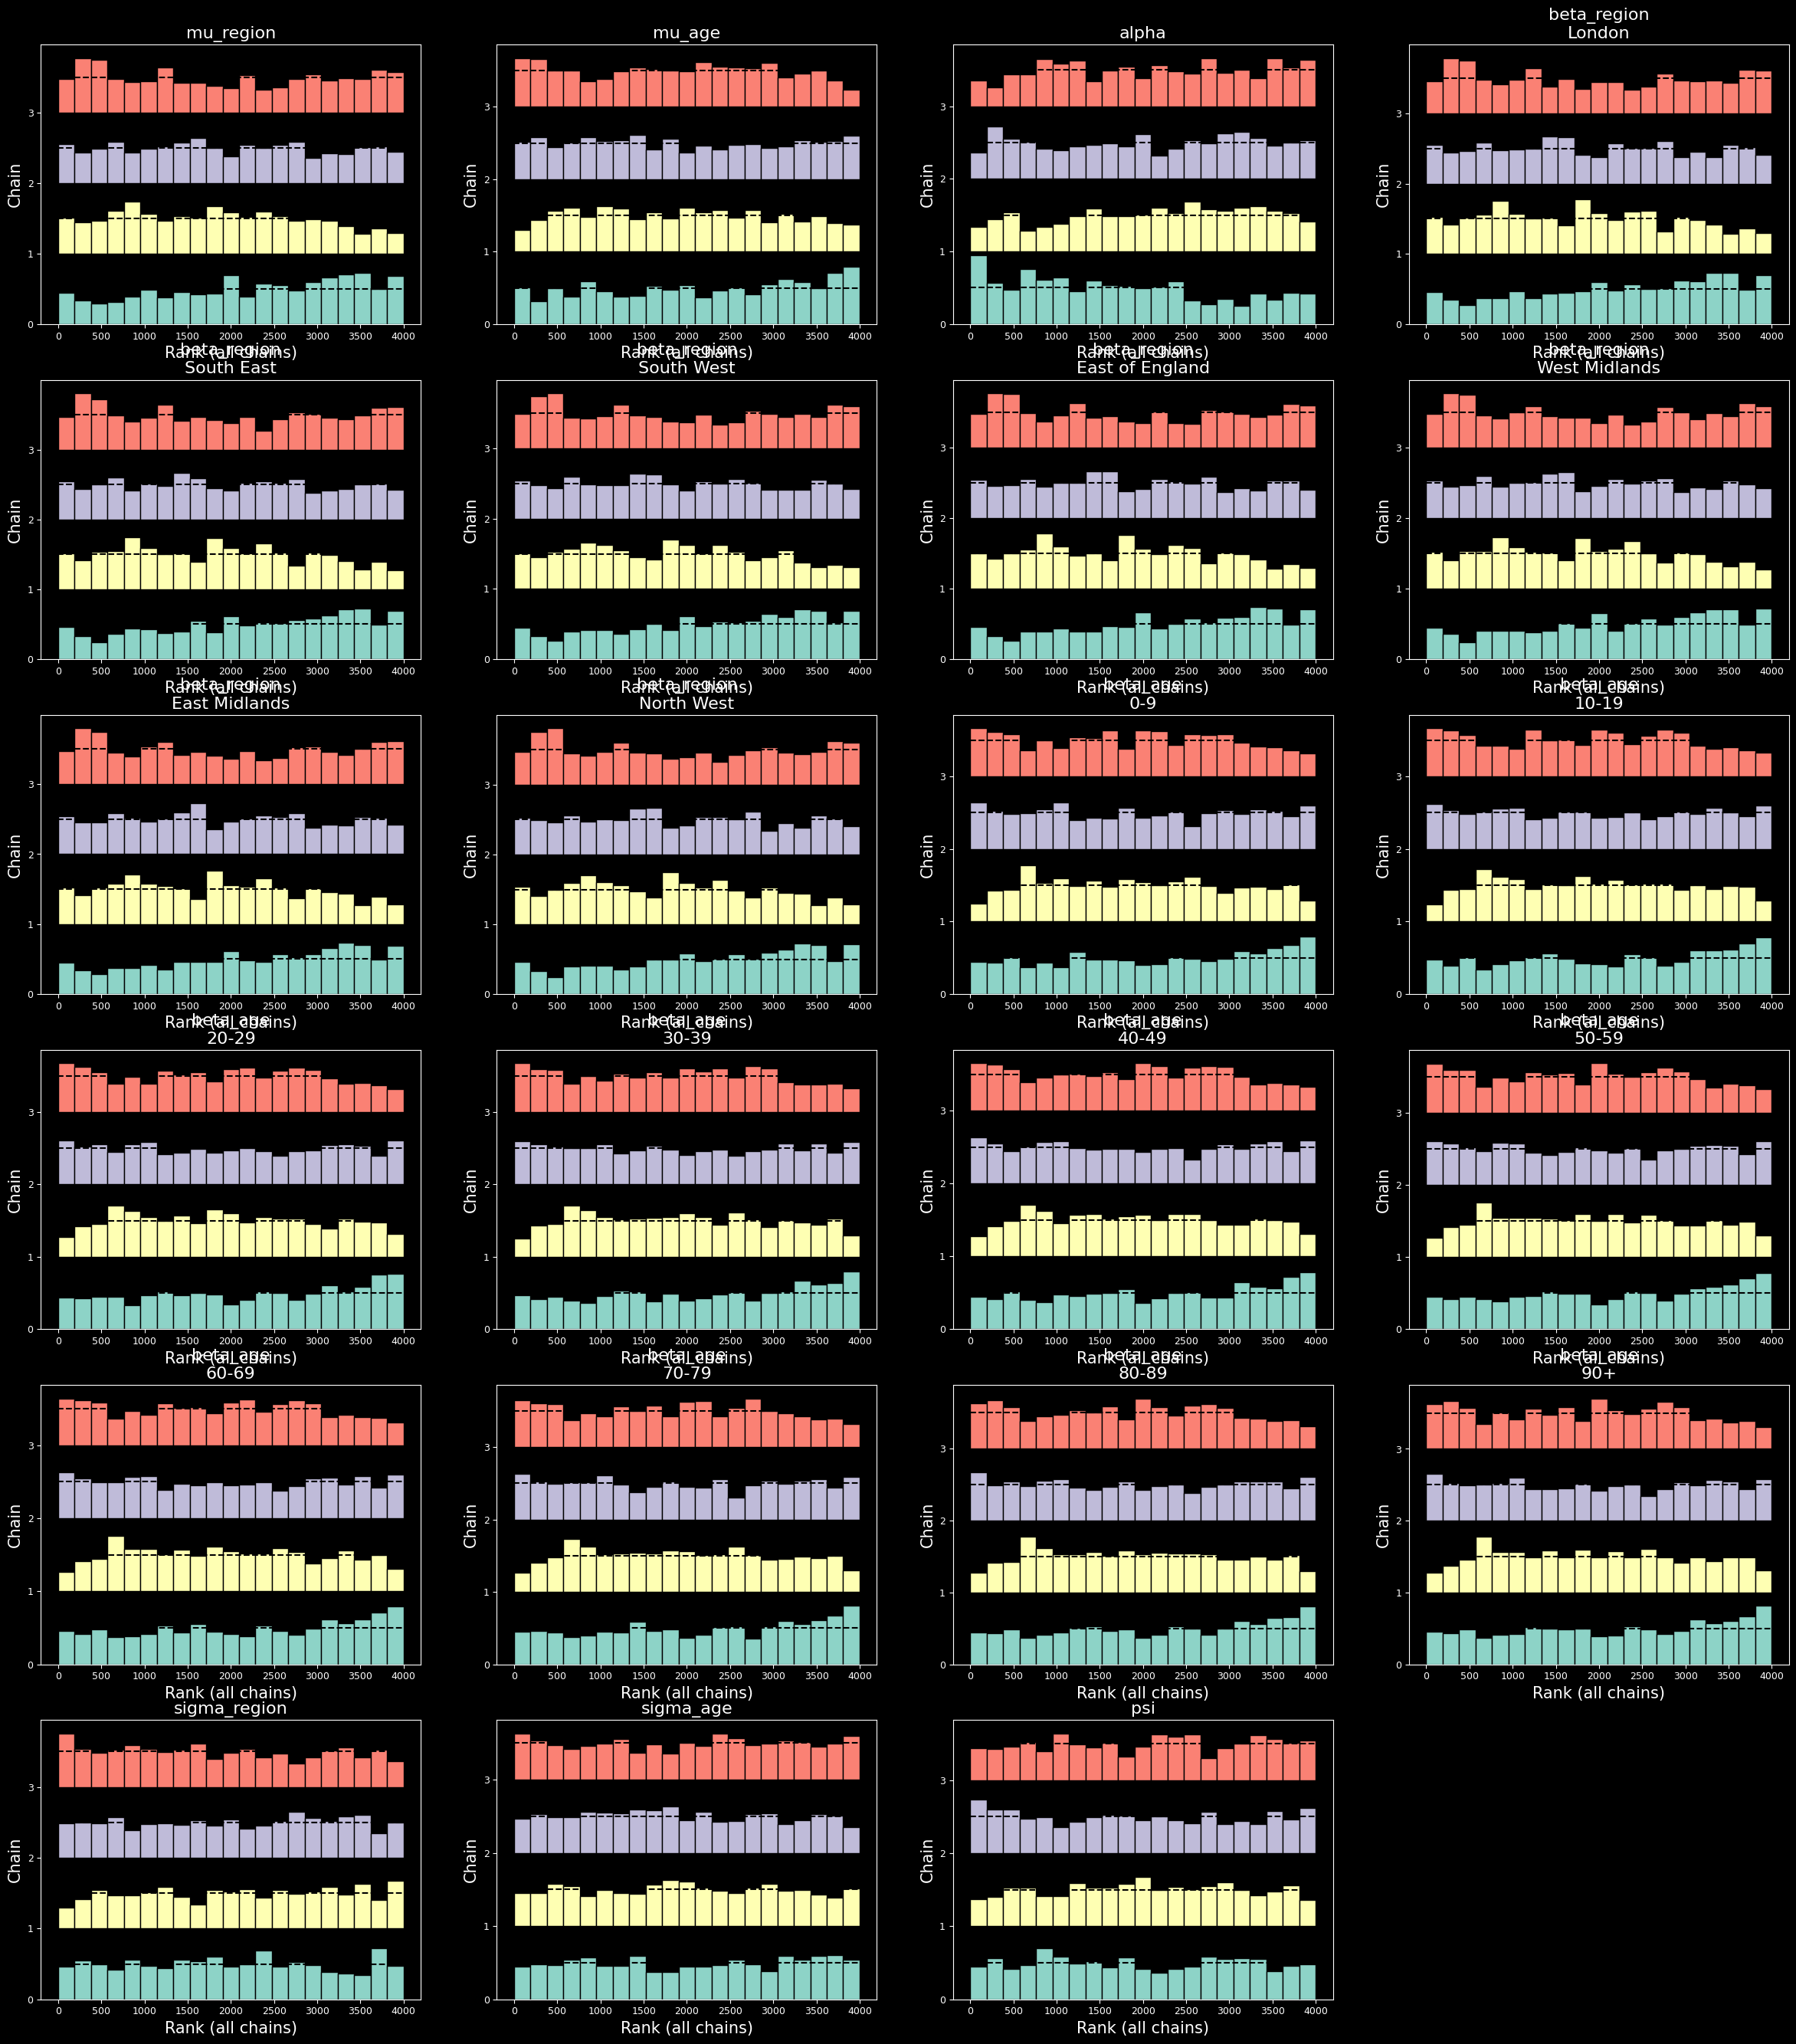

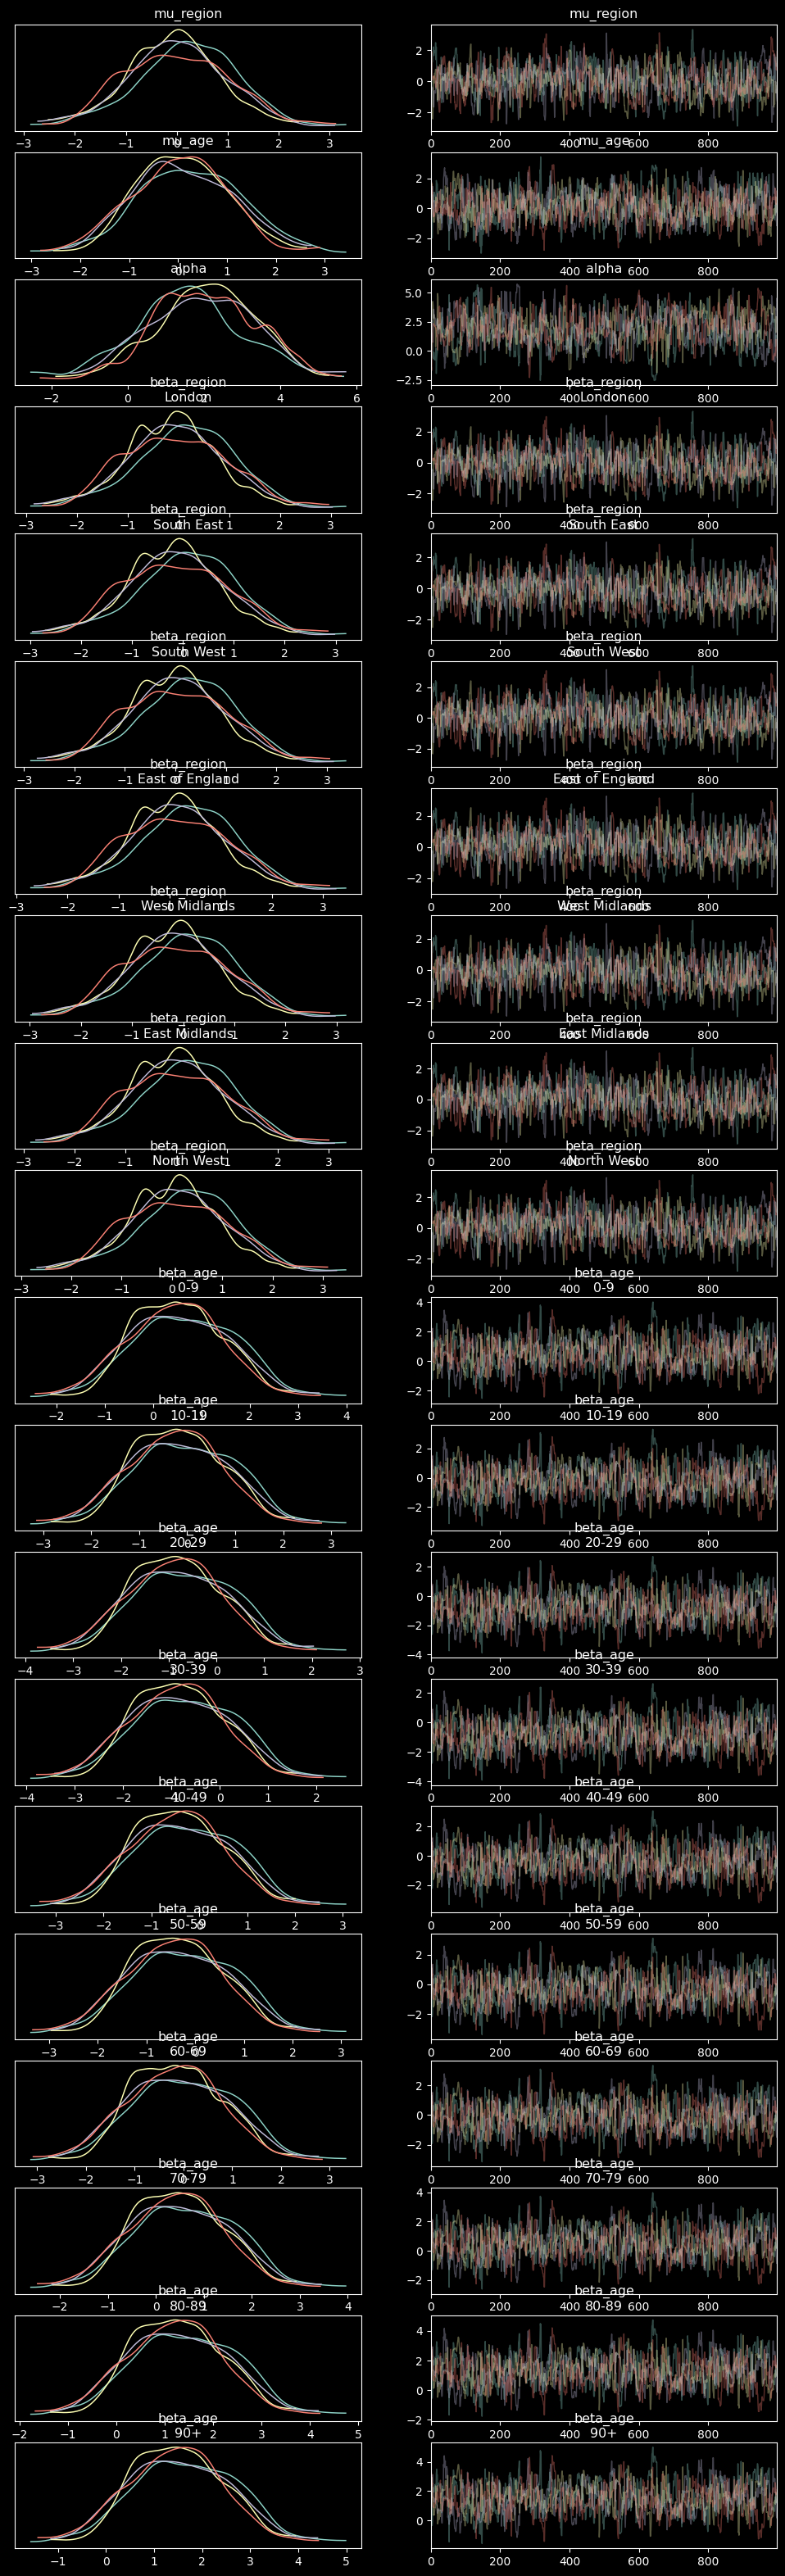

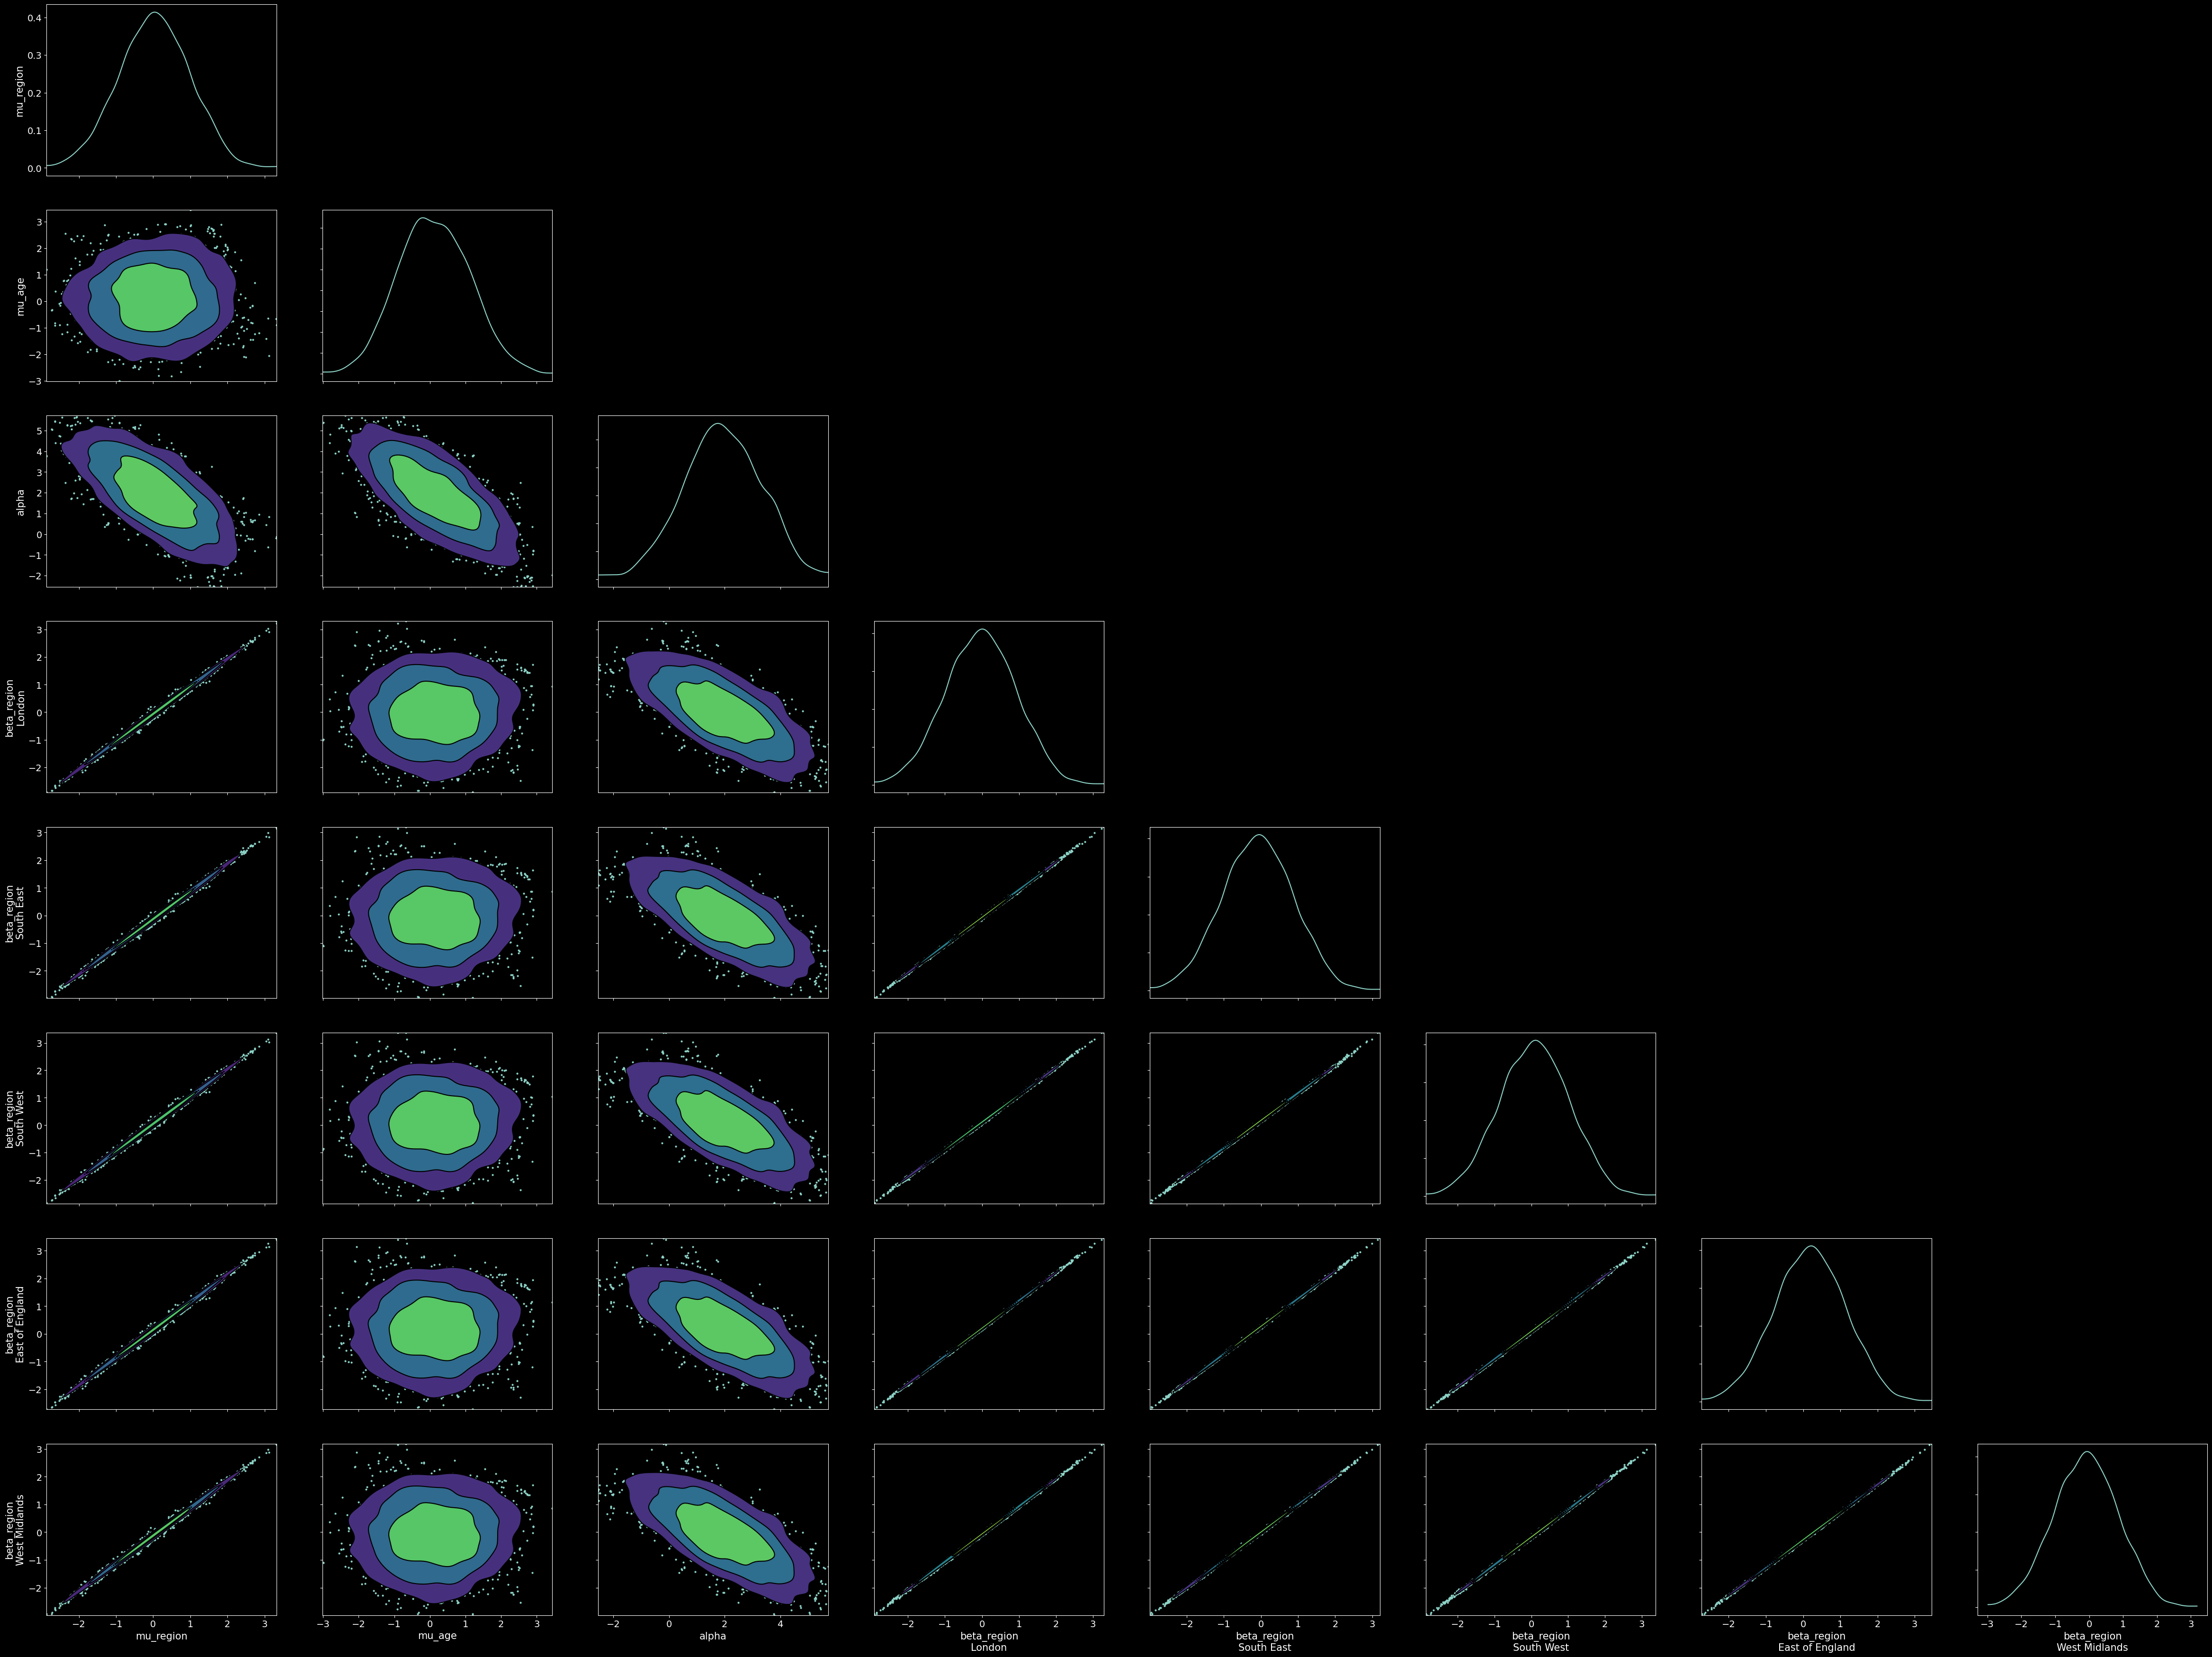

In [12]:
# Use MCMC to sample from the posterior distribution
with hierarchical_model:
    hierarchical_inference = pm.sample(
        draws=1000,
        nuts_sampler="blackjax",
        tune=1000,
        cores=4,
        chains=4,
        target_accept=0.9,
        progressbar=False,
    )
    hierarchical_posterior_pred = pm.sample_posterior_predictive(
        trace=hierarchical_inference,
        extend_inferencedata=True,
        predictions=True,
        progressbar=False,
    )

check_sampler(hierarchical_inference, var_names=["~lambda"])

Above, convergence between chains are chcked with `az.summary`, rank plots, trace plots, and posterior pairplots. The rank plots show that the chains are relatively well-mixed and the trace plots show that the chains are roughly stationary. The `az.summary` shows that the Gelman-Rubin statistic is mostly 1 or 1.1, with acceptable effective sample size (the lowest is around 400, which is 1/10 of 4000 total samples), which indicate sufficient convergence. The pairplots show that the most parameters are not correlated, except the coefficients of age group and region and their hyperparameters (which are parts of linear functions).

Overall, **the sampler was working to generate good posterior, but computationally, it was not as reliable as the complete pooling model.**


# Predictions

In this section, I will use the posterior or posterior predictive to predict the number of GP visits for the missing cells.

- Complete pooling model: I will use the posterior-predictive distribution to predict the number of GP visits for the missing cells. Since complete pooling assumes that the underlying parameter values are similar across all groups, leading to similar posterior predictive, I will use the posterior-predictive distribution (mean over 4000 samples and 4 chains), and pick a random sample from there to impute the missing number of GP visits.
- Partial pooling model: I will use the posterior distribution to predict the number of GP visits for the missing cells. Since partial pooling assumes that the underlying parameter values are different across all groups, I will collect the posterior parameters for each missing group ($\psi$, $\alpha$, $\beta_\text{age}$, $\beta_\text{region}$), reconstruct the Zero-Inflated Poisson distribution for each of them, and pick the mean of the distribution to impute the missing number of GP visits for each group.


## Complete pooling

Generate many posterior-predictive distributions and obtain one by taking the mean over 4000 samples and 4 chains.


Sampling: [y]


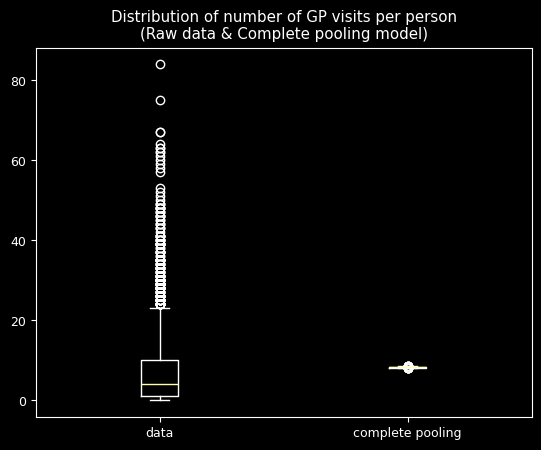

In [18]:
complete_pool_posterior_pred = (
    pm.sample_posterior_predictive(  # sample from the posterior predictive
        trace=complete_pooling_inference,
        model=complete_pooling_model,
        extend_inferencedata=True,
        progressbar=False,
    )
    .posterior_predictive["y"]  # extract the posterior predictive samples
    .mean(axis=(0, 1))  # mean over samples and chains
    .values  # extract the values
)
plt.boxplot(
    [counts.ravel(), complete_pool_posterior_pred.ravel()],
    tick_labels=["data", "complete pooling"],
)
plt.title(
    "Distribution of number of GP visits per person\n(Raw data & Complete pooling model)"
)
plt.show()

We can see that the posterior-predictive distribution under complete pooling is very clustered around one value (around 8-9). This makes sense, because complete pooling assumes that the underlying parameter values are similar across all groups, leading to similar posterior predictive.

Therefore, we can just pick a random sample from the posterior-predictive to impute the missing number of GP visits.


In [14]:
complete_pooling_filled_data = raw_data.copy()

rng = np.random.default_rng(12345)

for region_idx, age_idx, sample_index in missing_data_indices:
    complete_pooling_filled_data[region_idx, age_idx, sample_index] = rng.choice(
        complete_pool_posterior_pred
    )

## Hierarchical model


1. Locate the missing group (by indices of age group and region)
2. Collect the posterior parameters for each group ($\psi$, $\alpha$, $\beta_\text{age}$, $\beta_\text{region}$)
3. Reconstruct the Zero-Inflated Poisson distribution for each group. Notice that below I only use Poisson distribution, because the posterior parameters mentioned above were already influenced by the Zero-Inflated Poisson distribution during sampling, and I don't want to double count the zero-inflation.
4. Pick the mean of the distribution to impute the missing number of GP visits for each group.


In [15]:
import scipy.stats as sts

rng = np.random.default_rng(42)


def impute(inference: az.InferenceData = hierarchical_inference):
    filled_data = raw_data.copy()

    posterior = inference.posterior.stack(sample=("chain", "draw"))
    sample_size = posterior.sample.size

    for region_idx, age_idx, sample_index in missing_data_indices:
        # Get the distribution of lambda and psi for this region and age group
        region_coef = posterior["beta_region"].values[region_idx]
        age_coef = posterior["beta_age"].values[age_idx]
        intercept = posterior["alpha"].values
        rate = np.exp(intercept + region_coef + age_coef)

        # Sample from the Poisson distribution
        y_predicted = sts.poisson(mu=rate).rvs(size=sample_size)

        group_mean = np.mean(y_predicted)

        # impute the missing data with the group mean
        filled_data[region_idx, age_idx] = group_mean

    return filled_data


hierarchical_filled_data = impute(hierarchical_inference)

# Comparison

## Predictions

Below, I plot the average number of GP visits person for each group, with the missing cells imputed by the complete pooling model and the hierarchical model.


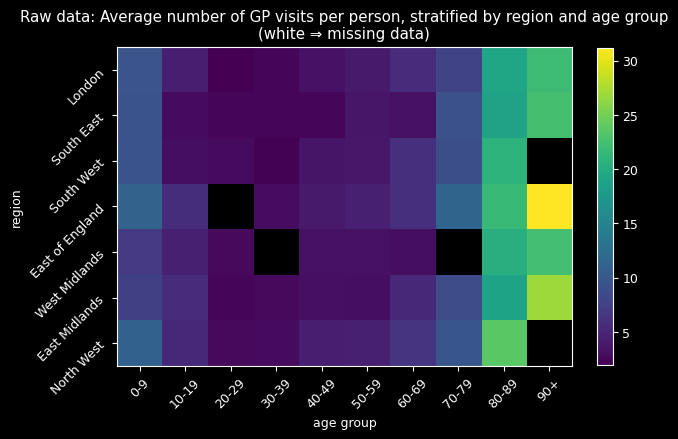

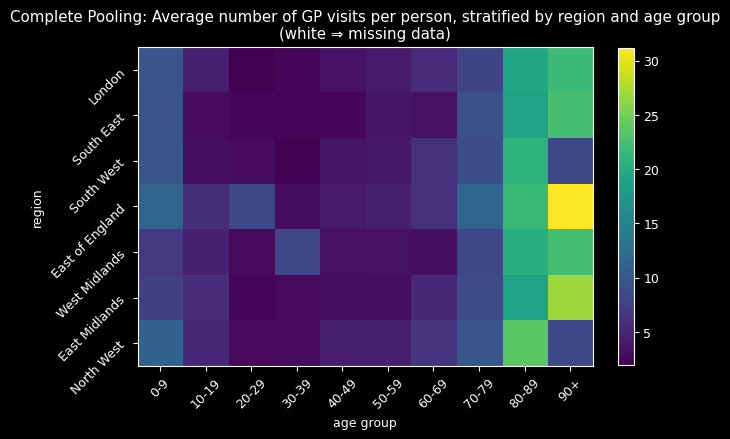

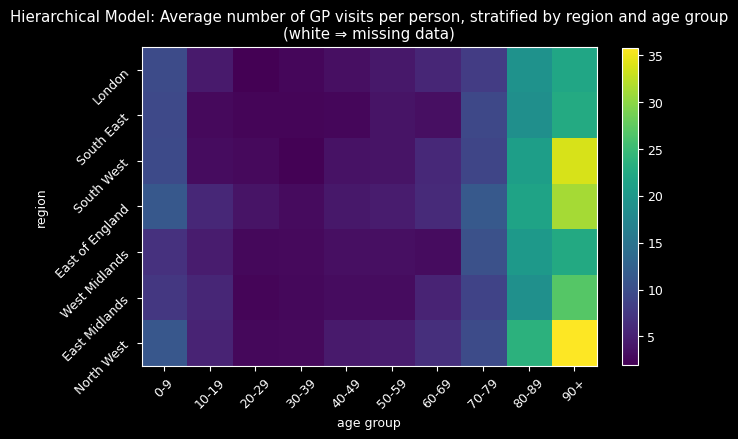

In [16]:
plot_heatmap(raw_data.mean(axis=2), "Raw data")
plot_heatmap(complete_pooling_filled_data.mean(axis=2), "Complete Pooling")
plot_heatmap(hierarchical_filled_data.mean(axis=2), "Hierarchical Model")

Qualitatively, we would expect the missing group to have a similar average number of GP visits as the adjacent groups, judged by region and age group. In this sense, the hierarchical model (partial pooling) does a better job at imputing the missing groups than the complete pooling model, because it allows more variations between groups. The complete pooling model is more likely to impute the missing groups with values that are closer to the mean of the data set. We can see the mismatches in (age group 20-29 & region North East and Yorkshire) and (age group 90+ & region Midlands).

However, I acknowledge that the visuals below only show the average number of GP visits per person for each group, and the complete pooling model might have done a better job at imputing the missing groups if we look at the entire posterior-predictive distribution. Below, we compare the two models quantitatively, using ELPD-LOO.


## Variance


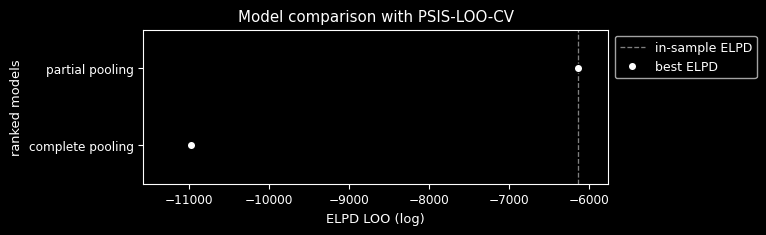

rank  elpd_loo  p_loo  elpd_diff  weight      se     dse  \
partial pooling      0  -6131.61  59.45       0.00    0.88  112.68    0.00   
complete pooling     1 -10967.89  13.13    4836.28    0.12  334.56  281.81   

                  warning scale  
partial pooling     False   log  
complete pooling    False   log

In [17]:
from src.utils.model_comparison import compare_models

with complete_pooling_model:
    pm.compute_log_likelihood(complete_pooling_inference, progressbar=False)

with hierarchical_model:
    pm.compute_log_likelihood(hierarchical_inference, progressbar=False)

compare_models(
    {
        "complete pooling": complete_pooling_inference,
        "partial pooling": hierarchical_inference,
    }
)

Upon comparing the Expected Log Predictive Density (ELPD) using Pareto Smoothed Importance Sampling Leave-One-Out Cross-Validation (PSIS-LOO) across the two models, we observe that **hierarchial model (partial pooling) has a better performance than complete pooling**. The rounded ELPD-LOO for the hierarchical model is substantially higher than that of the complete pooling model (-6131 > -10967). This indicates that the hierarchical model outperforms the complete pooling model in terms of predictive accuracy.

The weight associated with the hierarchical model is notably higher (0.88), suggesting a strong preference for the hierarchical model according to the ELPD. Additionally, the lower standard error (113) for the hierarchical model, compared to the complete pooling model (334), indicates that the hierarchical model exhibits greater confidence in its predictions.

This result aligns with expectations, as the hierarchical model, by allowing for more variation between groups, demonstrates a better capacity to capture the complexities present in the data. The hierarchical approach leverages information shared across groups, providing a more nuanced and accurate representation of the underlying patterns compared to the more restrictive complete pooling model.


# AI Statement

I used ChatGPT in explaining the partial pooling model in class to be able to apply my own model. The code and the write-up are my own work (ChatGPT generally sucks at PyMC).

# Collaboration credits

I discussed partial pooling with Felipe and asked Amos about imputation.


# References

Minerva University. (2022a, April 4). _CS146 Session 7.2 PCW: Hierarchical models_. Forum.

Minerva University. (2022b, April 4). _CS146 Session 7.2. Predictions from a hierarchical model_. Forum.

Nguyen, T. M., [Chiffon]. (2023). _CS146 Project 1_ [Assignment]. Minerva University.
